### Popularidad de canciones en Spotify

Se realizó un estudio de canciones de la plataforma Spotify en el año 2019. La idea es comprender qué características de la canción (Niveles de energía, bailabilidad, ruido, en vivo, positividad, acústica y discurso) pueden asociarse con una mayor popularidad de la canción.

Las variables de la base de datos _Spotify_ son las siguientes:


| Variable              | Descripción                                                                                |
|-----------------------|--------------------------------------------------------------------------------------------|
| Title                 | Nombre de la canción                                                                       |
| Artist                | Nombre del artista                                                                         |
| Beats per Minute(BPM) | Tempo de la canción                                                                        |
| Energy                | Nivel de energía de una canción, a mayor valor, más enérgica la canción                    |
| Danceability          | Nivel de bailabilidad de la canción, a mayor valor, más bailable es la canción             |
| Loudness              | Indicador de ruido en decibeles de la canción, a mayor valor, más ruidosa es la canción    |
| Positive_mood         | Nivel de positividad de la canción, a mayor valor, más positivo es el estado de ánimo inducido por la canción |
| Variable              | Descripción                                                                                |
| Length                | Duración de la canción (en segundos)                                                       |
| Acoustic              | Nivel de acústica de la canción, a mayor valor, más acústica es la canción                 |
| Speechiness           | Nivel de discurso de la canción, a mayor valor, más palabras contiene la canción           |
| Liveness              | Nivel de grabación 'en vivo' de la canción, a mayor valor, más grabada en vivo fue la canción |
| Popularity            | Índice de popularidad de la canción                                                        |


#### a) Cargue la base de datos y verifique que el formato de las variables sea el correcto. Además, elimine las variables _Title_ y _Artist_ de la base de datos, ya que no son variables informativas para el modelo.

In [1]:
import pandas as pd
df = pd.read_excel('Spotify.xlsx')

In [2]:
#formato
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Index                   1994 non-null   int64  
 1   Title                   1994 non-null   object 
 2   Artist                  1993 non-null   object 
 3   Top Genre               1993 non-null   object 
 4   Year                    1993 non-null   float64
 5   Beats Per Minute (BPM)  1993 non-null   float64
 6   Energy                  1993 non-null   float64
 7   Danceability            1993 non-null   float64
 8   Loudness (dB)           1993 non-null   float64
 9   Liveness                1993 non-null   float64
 10  Positive_mood           1993 non-null   float64
 11  Length (Duration)       1993 non-null   float64
 12  Acousticness            1993 non-null   float64
 13  Speechiness             1993 non-null   float64
 14  Popularity              1993 non-null   

In [3]:
df = df.drop(['Title', 'Artist', 'Index', 'Year', 'Top Genre'], axis = 1)

In [4]:
df = df.dropna(ignore_index = True)

#### b) Realice una separación de la base de datos en un set de entrenamiento y set de validación, utilice una proporción de 75:25 respectivamente. Para replicar sus resultados fije una semilla. 

In [5]:
y = df['Popularity']
X = df.drop(['Popularity'], axis = 1)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.25,
                                                   random_state = 2023)

#### c) Con los datos de entrenamiento realice un modelo de regresión lineal múltiple con todas las variables. Interprete los coeficientes.

In [7]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train)
model_1 = model.fit()

In [8]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Popularity   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     12.03
Date:                Wed, 26 Jul 2023   Prob (F-statistic):           1.70e-18
Time:                        13:13:08   Log-Likelihood:                -6042.6
No. Observations:                1494   AIC:                         1.211e+04
Df Residuals:                    1484   BIC:                         1.216e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     69.3172      3.807     18.208      0.000      61.850      76.785
Beats Per Minute (BPM)    -0.0032      0.013     -0.239      0.811      -0.029       0.023
Energy                    -0.0890      0.033     -2.729      0.006      -0.153      -0.025
Danceability               0.0837      0.029      2.918      0.004       0.027       0.140
Loudness (dB)              0.9708      0.151      6.441      0.000       0.675       1.266
Liveness                  -0.0968      0.022     -4.323      0.000      -0.141      -0.053
Positive_mood              0.0194      0.020      0.990      0.323      -0.019       0.058
Length (Duration)         -0.0018      0.004     -0.402      0.687      -0.011       0.007
Acousticness              -0.0094      0.017     -0.560      0.575      -0.042       0.023
Speechiness                0.2967      0.084      3.534      0.000       0.132       0.461
==============================================================================
Omnibus:                       65.288   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.328
Skew:                          -0.541   Prob(JB):                     1.19e-16
Kurtosis:                       2.916   Cond. No.                     3.32e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### d) Quite secuencialmente las variables que no aportan al modelo. La variable que aporta menos información al modelo puede identificarse buscando el valor-p más grande en el test de significancia. Ocupe una siginificancia del 0.05. Compare el AIC del modelo obtenido con el modelo anterior, comente. Interprete el coeficiente $R^{2}$.


In [9]:
X_train2 = X_train.drop(['Beats Per Minute (BPM)'], axis = 1)
model = sm.OLS(y_train, X_train2)
model_2 = model.fit()

In [10]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Popularity   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     13.54
Date:                Wed, 26 Jul 2023   Prob (F-statistic):           4.55e-19
Time:                        13:13:12   Log-Likelihood:                -6042.6
No. Observations:                1494   AIC:                         1.210e+04
Df Residuals:                    1485   BIC:                         1.215e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                68.9228      3.431     20.088      0.000      62.193      75.653
Energy               -0.0895      0.033     -2.747      0.006      -0.153      -0.026
Danceability          0.0849      0.028      3.009      0.003       0.030       0.140
Loudness (dB)         0.9712      0.151      6.446      0.000       0.676       1.267
Liveness             -0.0966      0.022     -4.319      0.000      -0.141      -0.053
Positive_mood         0.0190      0.020      0.975      0.330      -0.019       0.057
Length (Duration)    -0.0018      0.004     -0.408      0.683      -0.011       0.007
Acousticness         -0.0092      0.017     -0.552      0.581      -0.042       0.024
Speechiness           0.2946      0.083      3.530      0.000       0.131       0.458
==============================================================================
Omnibus:                       65.247   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.273
Skew:                          -0.541   Prob(JB):                     1.23e-16
Kurtosis:                       2.915   Cond. No.                     2.77e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
X_train3 = X_train2.drop(['Length (Duration)'], axis = 1)
model = sm.OLS(y_train, X_train3)
model_3 = model.fit()

In [12]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Popularity   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     15.46
Date:                Wed, 26 Jul 2023   Prob (F-statistic):           1.20e-19
Time:                        13:13:15   Log-Likelihood:                -6042.7
No. Observations:                1494   AIC:                         1.210e+04
Df Residuals:                    1486   BIC:                         1.214e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            68.5031      3.273     20.932      0.000      62.084      74.923
Energy           -0.0911      0.032     -2.819      0.005      -0.154      -0.028
Danceability      0.0850      0.028      3.012      0.003       0.030       0.140
Loudness (dB)     0.9801      0.149      6.577      0.000       0.688       1.272
Liveness         -0.0967      0.022     -4.321      0.000      -0.141      -0.053
Positive_mood     0.0209      0.019      1.102      0.271      -0.016       0.058
Acousticness     -0.0086      0.017     -0.516      0.606      -0.041       0.024
Speechiness       0.2959      0.083      3.549      0.000       0.132       0.460
==============================================================================
Omnibus:                       64.946   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.884
Skew:                          -0.539   Prob(JB):                     1.49e-16
Kurtosis:                       2.912   Cond. No.                         940.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
X_train4 = X_train3.drop(['Acousticness'], axis = 1)
model = sm.OLS(y_train, X_train4)
model_4 = model.fit()

In [14]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Popularity   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     18.00
Date:                Wed, 26 Jul 2023   Prob (F-statistic):           3.04e-20
Time:                        13:13:16   Log-Likelihood:                -6042.9
No. Observations:                1494   AIC:                         1.210e+04
Df Residuals:                    1487   BIC:                         1.214e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            67.6561      2.830     23.903      0.000      62.104      73.208
Energy           -0.0821      0.027     -3.023      0.003      -0.135      -0.029
Danceability      0.0863      0.028      3.072      0.002       0.031       0.141
Loudness (dB)     0.9726      0.148      6.559      0.000       0.682       1.263
Liveness         -0.0975      0.022     -4.367      0.000      -0.141      -0.054
Positive_mood     0.0199      0.019      1.057      0.291      -0.017       0.057
Speechiness       0.2931      0.083      3.523      0.000       0.130       0.456
==============================================================================
Omnibus:                       64.624   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.475
Skew:                          -0.538   Prob(JB):                     1.83e-16
Kurtosis:                       2.911   Cond. No.                         789.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
X_train5 = X_train4.drop(['Positive_mood'], axis = 1)
model = sm.OLS(y_train, X_train5)
model_5 = model.fit()

In [16]:
print(f'model 1: {model_1.aic}')
print(f'model 2: {model_2.aic}')
print(f'model 3: {model_3.aic}')
print(f'model 4: {model_4.aic}')
print(f'model 5: {model_5.aic}')

model 1: 12105.221040170976
model 2: 12103.278753633884
model 3: 12101.4466017168
model 4: 12099.714236415966
model 5: 12098.835332507926


Mientras mas pequeño el valor de AIC, mejor es el modelo, por lo tanto, el modelo más pequeño tienen mejor ajuste según el AIC.

In [18]:
print(f'model 1: {model_1.rsquared}')
print(f'model 2: {model_2.rsquared}')
print(f'model 3: {model_3.rsquared}')
print(f'model 4: {model_4.rsquared}')
print(f'model 5: {model_5.rsquared}')

model 1: 0.06801319659439764
model 2: 0.06797719309724626
model 3: 0.06787247621004777
model 4: 0.06770548021559952
model 5: 0.06700562479645


Mientras tanto, el mejor R2−ajustado es el modelo 3.

#### e) Realice análisis del supuesto de normalidad de los residuos. Para esto, utilice algún test de normalidad en Python. Obtenga el gráfico cuantil-cuantil de los residuos estandarizados. Comente.

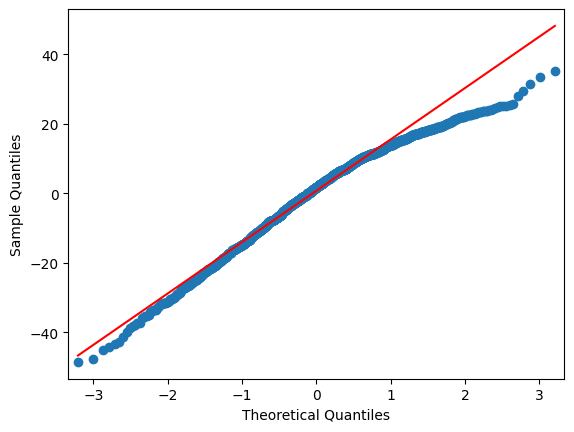

In [19]:
# Normalidad

## Grafico 
import statsmodels.api as sm

sm.qqplot(model_5.resid, line = 'q');

In [20]:
from scipy.stats import kstest
## TEST
# H0: Normalidad 
# H1: No Normalidad
ks_test = kstest(model_5.resid, 'norm')

In [21]:
ks_test.pvalue < 0.05 #se rechaza H0

True

Se rechaza la normalidad de los residuos. Viendo el gráfico de cuantil-cuantil, se aprecia que tiene las colas muy pesadas.


#### f) Realice análisis del supuesto de homocedasticidad e independencia de los residuos.


In [22]:
# Homocedasticidad -> varianza iguales 
### Test Breuch-Pagan
#### H0: Homocedasticidad
#### H1: Heterocedasticos
import statsmodels.stats.api as sms
estadistico, valor_p, _, _ = sms.het_breuschpagan(model_5.resid, model_5.model.exog)

In [23]:
valor_p < 0.05

True

Si se ocupa una significancia de 0.05, no se cumple el supuesto de Homocedasticidad. Se rechaza la hipótesis nula. Por lo tanto, se rechaza que los residuos tengan una varianza constante.

#### g) Una disquera quiere asegurar que su próximo lanzamiento en Spotify será todo un éxito y alcanzará grandes valores de popularidad. El track tiene las siguientes características:

- Beats per Minute(BPM): 109
- Energy: 63
- Danceability: 32 
- Loudness (dB): -3
- Liveness: 0
- Positive_mood: 54 
- Length: 195
- Acousticness: 20
- Speechiness: 72

#### En base al modelo entrenado, ¿usted le indicaría a la disquera que la canción tendrá alta o baja popularidad?

In [24]:
prediction = pd.DataFrame({'const':1.0,
                           'Beats Per Minute (BPM)' : 109, 
                           'Energy' : 63, 
                           'Danceability' : 32, 
                           'Loudness (dB)' : -3, 
                           'Liveness' : 0, 
                           'Positive_mood' : 54, 
                           'Length (Duration)' : 195,
                           'Acousticness' : 20, 
                           'Speechiness' : 72
}, index = [0])

In [29]:
variables_prediccion = prediction[X_train5.columns]

In [30]:
y_pred = model_5.predict(variables_prediccion)

In [31]:
y_pred

0    83.597422
dtype: float64

Como la popularidad se mueve entre 11 a 100, el valor de 83.597422 se considera alto.

### Fuga de clientes de una entidad bancaria

Cuando un cliente abandona la relación con cierta empresa o entidad, se le denomina *fuga*. En este taller, se desea construir un modelo de regresión logística para predecir la fuga de clientes de una entidad bancaria.

Los datos se encuentran en la base de datos _Fuga_ y la variable target se define como 1 si el cliente se fugó en el período de estudio y 0 si no. En el caso de que el cliente se haya fugado, se dispone de información de los últimos 12 meses antes de que se fugara, en el caso de que no se haya fugado, se dispone de información de los últimos 12 meses hasta el momento de la extracción de los datos. Las variables son las siguientes:


| Variable          | Descripción                                                                          |
|-------------------|--------------------------------------------------------------------------------------|
| Target            | Indica si un cliente se ha fugado (1: fugado, 0: no fugado)                          |
| Sexo              | Indica el sexo del cliente (M: mujer, H: hombre)                                     |
| Edad              | Edad del cliente (en años)                                                           |
| Antigüedad        | Meses de antiguedad del cliente en la institución                                    |
| Internauta        | Indica si un cliente utiliza los servicios web (1: sí, 0: no)                        |
| TC                | Número de tarjetas de crédito del cliente                                            |
| Cupo_TC           | Cupo promedio en tarjetas de crédito del cliente                                     |
| N_meses_activo    | Número de meses en los que el cliente realizó alguna transacción (últimos 12 meses)  |
| N_meses_avances   | Número de meses en los que el cliente realizó un avance (últimos 12 meses)           |
| N_transacciones   | Número de transacciones que realizó (últimos 12 meses)                               |
| Prom_revolving_TC | Revolving promedio (últimos 12 meses)                                                |
| Prom_facturado    | Promedio monto facturado (últimos 12 meses)                                          |
| Prom_pagos        | Promedio monto pagado mensualmente (últimos 12 meses)                                |
| Prom_uso_TC       | Promedio de uso de la Tarjeta de crédito (últimos 12 meses)                          |

**Nota:** El revolving corresponde a una línea de crédito concedida por una entidad financiera a un cliente, con un límite establecido del que puede disponer durante un tiempo determinado.



#### a) Cargue los datos en Python y revise los formatos de cada variable, recuerde codificar las variables como numéricas o factores según corresponda.




In [1]:
import pandas as pd
df = pd.read_excel('Fuga.xlsx')

In [33]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35540 entries, 0 to 35539
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Target             35540 non-null  int64  
 1   Sexo               35540 non-null  object 
 2   Edad               35540 non-null  int64  
 3   Antiguedad         35540 non-null  int64  
 4   Internauta         35540 non-null  int64  
 5   TC                 35540 non-null  int64  
 6   Cupo_TC            35540 non-null  float64
 7   N_meses_activo     35540 non-null  int64  
 8   N_meses_avances    35540 non-null  int64  
 9   N_transacciones    35540 non-null  int64  
 10  Prom_revolving_TC  35540 non-null  float64
 11  Prom_facturado     35540 non-null  float64
 12  Prom_pagos         35540 non-null  float64
 13  Prom_uso_TC        35540 non-null  float64
dtypes: float64(5), int64(8), object(1)
memory usage: 3.8+ MB


In [2]:
df['Internauta'] = df['Internauta'].astype('object')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35540 entries, 0 to 35539
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Target             35540 non-null  int64  
 1   Sexo               35540 non-null  object 
 2   Edad               35540 non-null  int64  
 3   Antiguedad         35540 non-null  int64  
 4   Internauta         35540 non-null  object 
 5   TC                 35540 non-null  int64  
 6   Cupo_TC            35540 non-null  float64
 7   N_meses_activo     35540 non-null  int64  
 8   N_meses_avances    35540 non-null  int64  
 9   N_transacciones    35540 non-null  int64  
 10  Prom_revolving_TC  35540 non-null  float64
 11  Prom_facturado     35540 non-null  float64
 12  Prom_pagos         35540 non-null  float64
 13  Prom_uso_TC        35540 non-null  float64
dtypes: float64(5), int64(7), object(2)
memory usage: 3.8+ MB


#### b) Realice una separación de la base de datos en un set de entrenamiento y set de validación, utilice una proporción de 80:20 respectivamente. Para poder replicar sus resultados, fije una semilla antes de obtener los índices.


In [3]:
df = pd.get_dummies(df, drop_first = True, dtype = int)

In [4]:
y = df['Target']
X = df.drop(['Target'], axis = 1)

In [5]:
import random 
from sklearn.model_selection import train_test_split
random.seed(2)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.2,
                                                   random_state = 2023)

#### c) Con los datos de entrenamiento realice un modelo de regresión logística para estudiar la fuga de clientes, para ello utilice las variables sexo, edad y el monto promedio facturado como variables predictoras.

c.1) Calcule e interprete los OR correspondientes al modelo, ¿son estos factores protectores o agravantes de la fuga del cliente?


In [6]:
X_train_nvo = X_train[['Sexo_M', 'Edad', 'Prom_facturado']]

In [7]:
import statsmodels.api as sm
X_train_nvo = sm.add_constant(X_train_nvo)
model_logist = sm.Logit(y_train, X_train_nvo).fit()

Optimization terminated successfully.
         Current function value: 0.282999
         Iterations 7


In [41]:
model_logist.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Target   No. Observations:                28432
Model:                          Logit   Df Residuals:                    28428
Method:                           MLE   Df Model:                            3
Date:                Wed, 26 Jul 2023   Pseudo R-squ.:                 0.04094
Time:                        13:17:45   Log-Likelihood:                -8046.2
converged:                       True   LL-Null:                       -8389.7
Covariance Type:            nonrobust   LLR p-value:                1.416e-148
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -2.2196      0.074    -30.004      0.000      -2.365      -2.075
Sexo_M            -0.1564      0.043     -3.638      0.000      -0.241      -0.072
Edad               0.0176      0.002     10.559      0.000       0.014       0.021
Prom_facturado -1.287e-05   6.09e-07    -21.123      0.000   -1.41e-05   -1.17e-05
==================================================================================
"""

In [8]:
import numpy as np
tabla = pd.DataFrame({'Probabilidad/OR' : (np.exp(model_logist.params[1:])), 
              'Chances': (1-np.exp(model_logist.params[1:]))})
tabla

,Probabilidad/OR,Chances
Sexo_M,0.855196,0.144804
Edad,1.017781,-0.017781
Prom_facturado,0.999987,0.000013


* El riesgo de fuga de un cliente es menor si es de sexo mujer respecto del sexo hombre (14% menos de chance de fugarse si es mujer).

* A medida que aumenta la edad, existe un mayor riesgo de fugarse. En particular, se tienen que con cada un año de edad, se aumenta en un 1% las chances de fugarse en comparación al nivel anterior.

* A medida que aumenta el promedio facturado, existe menor riesgo de fugarse. En particular, se tienen que con cada un unidad de promedio facturado, se disminuye en un 0.000013% las chances de fugarse en comparación al nivel anterior.

c.2) En base al modelo obtenido, ¿en cuánto cambia el riesgo de fugarse un cliente de 34 años con relación a una de 24 años?

In [73]:
np.exp(0.0179081*34)/(np.exp(0.0179081*24))
## [1] 1.196118

1.1961176257718131

Sabemos que, por cada unidad de aumento de la edad, el logaritmo de las chances de fugarse aumenta en 0.0179081.

Para una persona de 34 y 24 años la diferencia es de 10 años, por ende, las probabilidades de fugarse de una persona de 34 años respecto a una persona de 24 son 1.19. Es decir, una persona de 34 años tiene 19% más de chances de fugarse que una de 24 años.


#### d) Utilizando un método automatizado, encuentre el modelo óptimo usando como criterio el criterio de información de Akaike (AIC). 

In [9]:
from estyp.linear_model import LogisticRegression

Made by Esteban Rucán. Contact me in LinkedIn: https://www.linkedin.com/in/estebanrucan/


In [10]:
from estyp.linear_model.stepwise import both_selection

In [11]:
df_train = pd.concat([X_train, y_train], axis = 1)

In [12]:
formula_todos = 'Target ~ ' + ' + '.join(X_train.columns) 
formula_todos

'Target ~ Edad + Antiguedad + TC + Cupo_TC + N_meses_activo + N_meses_avances + N_transacciones + Prom_revolving_TC + Prom_facturado + Prom_pagos + Prom_uso_TC + Sexo_M + Internauta_1'

In [13]:
from estyp.linear_model import LogisticRegression
from estyp.linear_model.stepwise import both_selection
from warnings import filterwarnings
filterwarnings("ignore")

formula_resultante = both_selection(
    formula = formula_todos,
    data    = df_train,
    model   = LogisticRegression
)

Este proceso tarda un buen tiempo ¡Paciencia! Momento de cuestionarte si eres feliz.
AIC Inicial: 17558.85
No hay mejoras en el AIC, por lo que no se eliminarán variables.


#### e) Utilizando la base de validación y el modelo obtenido en base al método backward, calcule las probabilidades de fugarse del banco.

In [14]:
formula_resultante

'Target ~ Edad + Antiguedad + TC + Cupo_TC + N_meses_activo + N_meses_avances + N_transacciones + Prom_revolving_TC + Prom_facturado + Prom_pagos + Prom_uso_TC + Sexo_M + Internauta_1'

In [15]:
import statsmodels.formula.api as smf
model = smf.logit(formula_resultante, data = df_train).fit()

Optimization terminated successfully.
         Current function value: 0.262343
         Iterations 8


In [98]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Target   No. Observations:                28432
Model:                          Logit   Df Residuals:                    28420
Method:                           MLE   Df Model:                           11
Date:                Mon, 24 Jul 2023   Pseudo R-squ.:                  0.1168
Time:                        18:01:04   Log-Likelihood:                -7413.8
converged:                       True   LL-Null:                       -8394.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.6640      0.107     -6.234      0.000      -0.873      -0.455
Edad                  0.0066      0.002      3.061      0.002       0.002       0.011
Antiguedad           -0.0012      0.001     -1.461      0.144      -0.003       0.000
TC                   -0.1371      0.028     -4.899      0.000      -0.192      -0.082
N_meses_activo       -0.1178      0.009    -12.740      0.000      -0.136      -0.100
N_transacciones      -0.0051      0.002     -2.998      0.003      -0.008      -0.002
Prom_revolving_TC  1.527e-06    8.7e-08     17.552      0.000    1.36e-06     1.7e-06
Prom_facturado    -5.315e-06   8.07e-07     -6.585      0.000    -6.9e-06   -3.73e-06
Prom_pagos        -4.646e-06   6.17e-07     -7.528      0.000   -5.86e-06   -3.44e-06
Prom_uso_TC        5.099e-07   4.52e-08     11.273      0.000    4.21e-07    5.99e-07
Sexo_M               -0.1468      0.044     -3.300      0.001      -0.234      -0.060
Internauta_1         -0.6144      0.048    -12.735      0.000      -0.709      -0.520
=====================================================================================
"""

#### f) Evalúe el modelo, para ello obtenga e interprete los siguientes estadísticos, ocupando los datos de entrenamiento y prueba. Comente los resultados.

f.1) Test de Kolmogorov - Smirnov

* Base de entrenamiento

In [16]:
y_prob = model.predict(X_train)

In [17]:
y_prob2 = np.array(pd.concat([1-y_prob, y_prob], axis = 1))

In [18]:
y_prob

31629    0.081357
12499    0.028561
11204    0.199288
27340    0.210066
19042    0.262909
           ...   
7605     0.064644
26513    0.040767
357      0.078978
470      0.054802
22041    0.091356
Length: 28432, dtype: float64

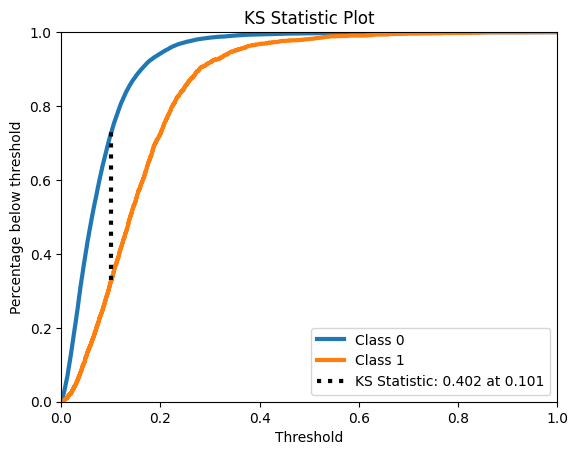

In [58]:
import scikitplot.metrics as skplt
skplt.plot_ks_statistic(y_train, y_prob2);

* Base de testeo

In [59]:
y_prob_test = model.predict(X_test)
y_prob3 = np.array(pd.concat([1-y_prob_test, y_prob_test], axis = 1))

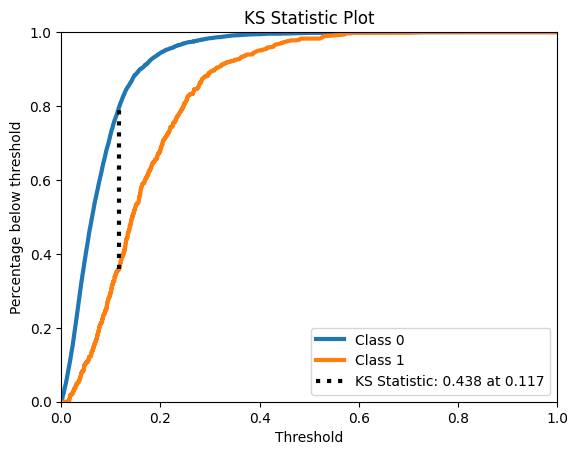

In [60]:
import scikitplot.metrics as skplt
skplt.plot_ks_statistic(y_test, y_prob3);

Se aprecia que los valores obtenidos son decentes, pero no lo suficientemente buenos. De todas formas, tanto en la base de entrenamiento como en la base de test, se obtienen valores similares, lo que indicaria que no existe un sobreajuste del modelo.

f.2) Test de Hosmer - Lemeshow


In [189]:
from scipy.stats import chi2
def HL_test(y_prob, y, col_name_respuesta, corte):
    
  # Hoslem-Lemeshow Test
    y_prob = pd.DataFrame(y_prob)
    y_prob1 = pd.concat([y_prob, y], axis =1)
    y_prob1['decile'] = pd.qcut(y_prob1[0], corte)
    obsevents_pos = y_prob1[col_name_respuesta].groupby(y_prob1.decile).sum()
    obsevents_neg = y_prob1[0].groupby(y_prob1.decile).count() - obsevents_pos
    expevents_pos = y_prob1[0].groupby(y_prob1.decile).sum()
    expevents_neg = y_prob1[0].groupby(y_prob1.decile).count() - expevents_pos
    hl = ((obsevents_neg - expevents_neg)**2/expevents_neg).sum()+ ((obsevents_pos - expevents_pos)**2/expevents_pos).sum()
    print('chi-square: {:.2f}'.format(hl))
    ## df = group-2
    pvalue=1-chi2.cdf(hl, corte - 2)
    print('p-value: {:.2f}'.format(pvalue))

In [194]:
col_name_respuesta = 'Target'
corte = 10
HL_test(y_prob2, y_test, col_name_respuesta, corte)

chi-square: 695067.97
p-value: 0.00


In [195]:
HL_test(y_prob3, y_test, col_name_respuesta, corte)

chi-square: 169357.61
p-value: 0.00


Como tenemos un valor-p de 0.0 < 0.05, por ende existe evidencia para rechazar que no existen diferencias entre los valores observados y pronosticados.



#### g) El banco desea generar una campaña de retención de clientes. Para ello, usted debe identificar un punto de corte el cual optimice la sensibilidad del modelo, pero que cometa como máximo una tasa de falsos positivos (1 - Especificidad) de a lo más un 30%.


In [62]:
y_prob = model.predict(X_train)

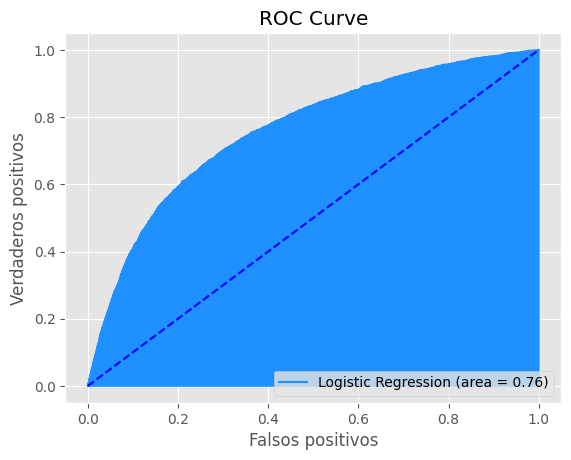

In [63]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
plt.style.use('ggplot')
# ROC curve
logit_roc_auc = roc_auc_score(y_train, y_prob)
fpr, tpr, thresholds = roc_curve(y_train, y_prob)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc, color = 'dodgerblue')
plt.fill_between(fpr, tpr, color='dodgerblue')
plt.plot([0, 1], [0, 1],'b--')
plt.xlabel('Falsos positivos')
plt.ylabel('Verdaderos positivos')
plt.legend(loc="lower right")
plt.title('ROC Curve')
plt.show();

In [64]:
df_resumen = pd.DataFrame({'Falsos Positivos': fpr, 
              'Verdaderos Positivos': tpr, 
              'umbral': thresholds})

In [65]:
df_resumen[df_resumen['Falsos Positivos'] < 0.3]

,Falsos Positivos,Verdaderos Positivos,umbral
0,0.000000,0.000000,1.981158
1,0.000039,0.000000,0.981158
2,0.000039,0.000405,0.978422
3,0.000193,0.000405,0.883773
4,0.000193,0.001216,0.855705
...,...,...,...
2622,0.297566,0.698541,0.095348
2623,0.298567,0.698541,0.095111
2624,0.298567,0.698947,0.095085
2625,0.299915,0.698947,0.094848


In [66]:
corte = 0.094831

#### h) Con la base de entrenamiento y test, obtenga las matrices de confusión y los indicadores de:

* Área bajo la curva
* Sensibilidad
* Especificidad
* Precisión
* F1 Score 

#### Comente.

In [67]:
y_pred_train = (model.predict(X_train) > corte).astype(int)
y_pred_test = (model.predict(X_test) > corte).astype(int)

* Entrenamiento

In [68]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_train, y_pred_train, labels = [0, 1])

In [71]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

sensibilidad_train = TP / float(TP+FN)
print('Sensibilidad: ', sensibilidad_train)
especificidad_train = TN / float(TN+FP)
print('Especificidad:', especificidad_train)
precision_train = (TP) /(TP + FP)
print('Precisión:', precision_train)
#F1 = 2 * (precision * recall) / (precision + recall)
recall = TP / (TP + FN) 
precision = (TP) /(TP + FP)
F1_train = 2 * (precision * recall) / (precision + recall)
print('F1-Score', F1_train)
auc_train = (TP + TN) /(TP + TN + FN + FP)
print('Área bajo la curva:', auc_train)

Sensibilidad:  0.6989465153970826
Especificidad: 0.7000847327068248
Precisión: 0.18134987384356602
F1-Score 0.2879799666110183
Área bajo la curva: 0.6999859313449635


* Validación

In [72]:
confusion = confusion_matrix(y_test, y_pred_test, labels = [0, 1])

In [73]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

sensibilidad_test = TP / float(TP+FN)
print('Sensibilidad: ', sensibilidad_test)
especificidad_test = TN / float(TN+FP)
print('Especificidad:', especificidad_test)
precision_test = (TP) /(TP + FP)
print('Precisión:', precision_test)
#F1 = 2 * (precision * recall) / (precision + recall)
recall = TP / (TP + FN) 
precision = (TP) /(TP + FP)
F1_test = 2 * (precision * recall) / (precision + recall)
print('F1-Score', F1_test)
auc_test = (TP + TN) /(TP + TN + FN + FP)
print('Área bajo la curva:', auc_test)

Sensibilidad:  0.7229299363057324
Especificidad: 0.6981481481481482
Precisión: 0.1883817427385892
F1-Score 0.29888084265964454
Área bajo la curva: 0.7003376477208779


In [74]:
train = [sensibilidad_train, especificidad_train, precision_train, F1_train, auc_train]
test = [sensibilidad_test, especificidad_test, precision_test, F1_test, auc_test]

In [75]:
pd.DataFrame({'Entrenamineto': train, 
              'Validación': test},
            index = ['Sensibilidad', 'Especificidad', 'Precisión','F1', 'AUC'])

,Entrenamineto,Validación
Sensibilidad,0.698947,0.722930
Especificidad,0.700085,0.698148
Precisión,0.181350,0.188382
F1,0.287980,0.298881
AUC,0.699986,0.700338


#### i) Se quiere aplicar una campaña a clientes probables de fugarse (ofrecer productos personalizados, mejores tasas de interés, aumento de cupo, etcétera). Si este cliente tiene las siguientes características en los últimos 12 meses:

- Sexo: Masculino
- Edad: 33 Años
- Antiguedad: 10 meses
- Internauta: Sí
- Tarjetas de crédito: 2
- Cupo_TC: 1.200.000
- N_meses_activo: 7
- N_meses_avances: 3
- N_transacciones: 13
- Prom_revolving_TC: 0
- Prom_facturado: 532.132
- Prom_pagos: 680.200
- Prom_uso_TC: 720.120

#### ¿Usted le aplicaría la campaña anti-fuga a este cliente?

In [80]:
prediction = pd.DataFrame({'Sexo_M': 1,
                           'Edad': 33,
                           'Antiguedad': 10,
                           'Internauta_1': 1,
                           'TC': 2,
                           'Cupo_TC': 1200000,
                           'N_meses_activo': 7,
                           'N_meses_avances': 3,
                           'N_transacciones': 13,
                           'Prom_revolving_TC': 0,
                           'Prom_facturado': 532.132,
                           'Prom_pagos': 680200,
                           'Prom_uso_TC': 720120}, index = [1])

In [81]:
model.predict(prediction)

1    0.013206
dtype: float64

La probabilidad de fugarse es casi 0 para este cliente. No se recomienda aplicar campaña.

In [83]:
import stepwise_regression

In [84]:
?stepwise_regression